In [81]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras

In [82]:
# 2. 데이터준비

df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")

In [83]:
# 2-1 데이터를 보기
print(df_train.info())
# survived 값이 y 값임
print("=======================================")
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [84]:
df_train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

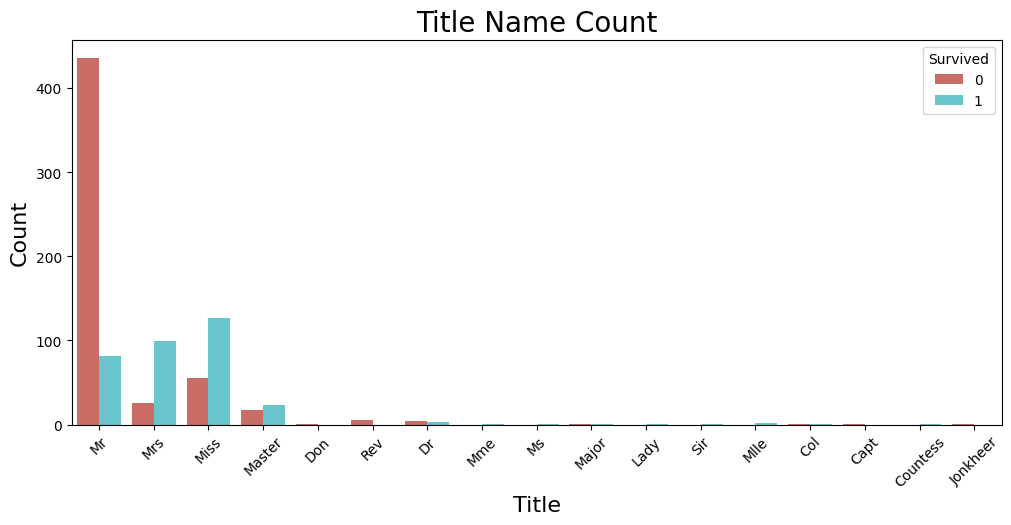

In [85]:
# 타이틀이라는 칼럼을 추가
# re 라이브러리를 이용해 Name 칼럼의 mr, mrs 같은 부분 만 추출합니다.
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


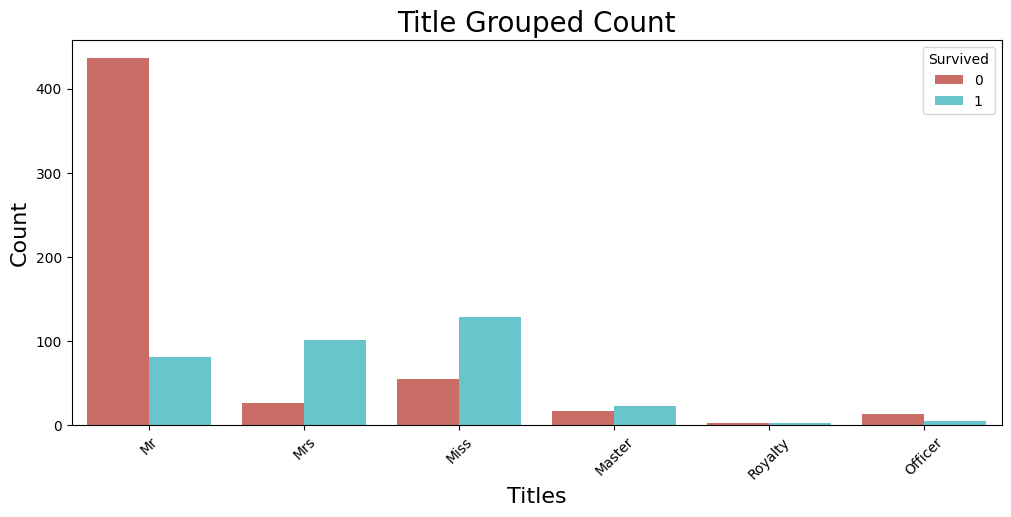

In [86]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
# Title 과 Survived 칼럼의 평균치
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#x 축은 mr ,ms... 칼럼이 있는 타이틀 이고 
#hue 옵션으로 survived 를 넣음
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

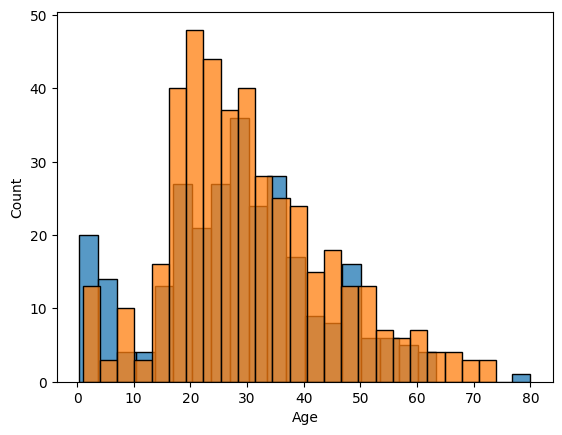

In [87]:
# 3 이제 결측치 NaN 값을 처리해야합니다.

age_high_zero_died = df_train[(df_train["Age"]>0)&
                              (df_train["Survived"]==0)]
age_high_zero_surv = df_train[(df_train["Age"]>0)&
                              (df_train["Survived"]==1)]

sns.histplot(age_high_zero_surv["Age"],bins=24)
sns.histplot(age_high_zero_died["Age"],bins=24)

plt.show()


In [88]:
# 널값이 있는 칼럼 조회
df_train.isnull().any()
# 여기서 Age,Cabin,Embarked,Title 은 널값이 존재하므로 
# 널값을 dropna 하거나 평균치,랜덤,중앙값 등으로 치환 이 필요합니다

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title           True
dtype: bool

In [89]:
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

# 여기서 median 은 중앙값 
# mean 은 평균값임
# 나이의 중앙값을 성별,타이틀,퍼스트클래스 별로 정렬 
print(age_group.median())


Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [90]:
print(df_train.loc[df_train.Age.isnull(),"Age"])

# 널 값을 나이,성,타이틀별 중앙값으로 대체합니다.
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

print(df_train["Age"].isnull().sum())

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64
0


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/I

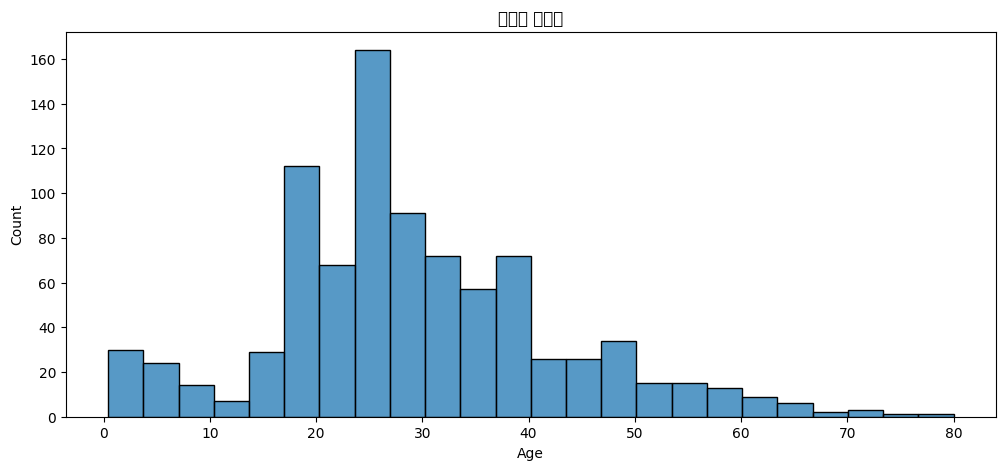

In [91]:
plt.figure(figsize=(12,5))

sns.histplot(df_train.Age,bins=24)
plt.title("연령별 분포도")
plt.xlabel("Age")
plt.show()

<Figure size 1200x500 with 0 Axes>

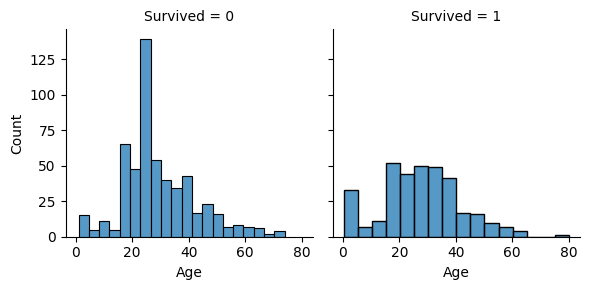

In [92]:
# 패싯그리드 col 항목에 Survived 를 적용함으로 나누어짐
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.histplot, "Age")
plt.show()

In [93]:
# 나이별로 나눈 칼럼 만들기
interval = (0,5,12,18,25,35,60,120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_train["Age_cat"] = pd.cut(df_train.Age,interval, labels =cats)

print(df_train.Age_cat.head())

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']


In [94]:
# Age 를 라벨링한 Age_cat 칼럼 만들기
interval = (0, 5, 12, 18, 25, 35, 60, 120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

In [95]:
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Seting the figure size

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


In [96]:
Age_fare = ["Pclass","Age_cat"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

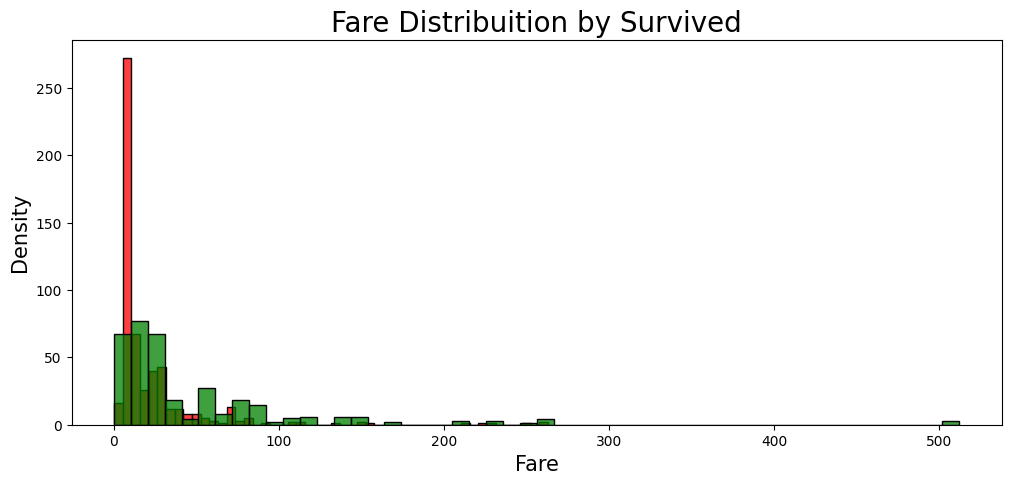

In [97]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.histplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.histplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

In [98]:
len(df_train.columns)
# Fare 의 NaN 결측치를 -0.5 로 채우기
df_train.Fare = df_train.Fare.fillna(-0.5)

df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title           True
Age_cat        False
dtype: bool

In [99]:
# df_train.Fare
# Fare 데이터를 라벨링한 Fare_cat 칼럼 만들기
quant = (-1, 0, 8, 15, 31, 600)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)
df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

In [100]:
print(pd.crosstab(df_train.Fare_cat,df_train.Survived))

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


In [101]:
# 문자열 칼럼 제거
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]


In [102]:
df_train.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quart_1
1,2,1,1,female,1,0,C,Mrs,Adult,quart_4
2,3,1,3,female,0,0,S,Miss,Young,quart_1
3,4,1,1,female,1,0,S,Mrs,Young,quart_4
4,5,0,3,male,0,0,S,Mr,Young,quart_2


In [103]:
# Embarked 칼럼 결측치 제거 
df_train["Embarked"] = df_train["Embarked"].fillna('S')
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
SibSp          False
Parch          False
Embarked       False
Title           True
Age_cat        False
Fare_cat       False
dtype: bool

In [104]:
# 데이터를 하나로 묶기
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

In [105]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
0,1,0,3,male,S,Mr,Student,quart_1,2
1,2,1,1,female,C,Mrs,Adult,quart_4,2
2,3,1,3,female,S,Miss,Young,quart_1,1
3,4,1,1,female,S,Mrs,Young,quart_4,2
4,5,0,3,male,S,Mr,Young,quart_2,1


In [106]:
# 겟 더미로 인덱싱 하기
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,FSize,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Teen,Age_Student,...,Age_Senior,Fare_quart_1,Fare_quart_2,Fare_quart_3,Fare_quart_4,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Officer,Prefix_Royalty
0,1,0,3,2,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,1,1,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


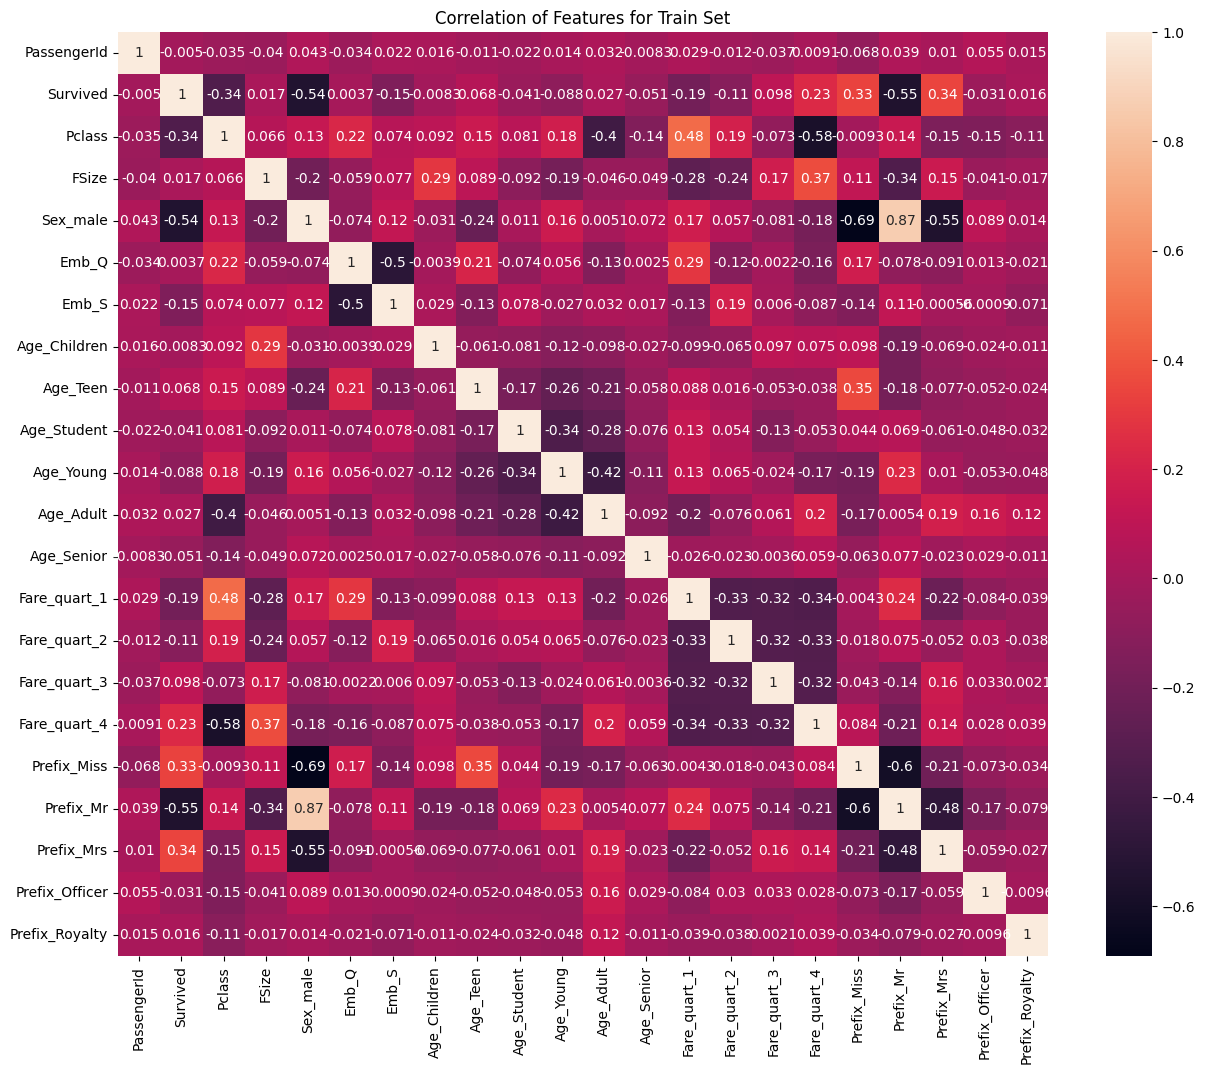

In [108]:
#데이터의 히트맵 확인해보기
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

x= df_train.drop(["Survived","PassengerId"],axis=1)
y= df_train["Survived"]

x_train, x_test, y_train,y_test = train_test_split(
                                                    x,
                                                    y,
                                                    train_size=0.8,
                                                    
                                                    shuffle = True,
                                                    #  stratify 는 데이터 불균형을 해결해줌
                                                    stratify=y,
                                                    random_state=21
                                                   )

In [110]:
x_train.head()

print(x_train.shape)

(712, 20)


In [111]:
# 모델구성

model = Sequential([
    Dense(18,input_shape=(20,),activation="relu"),
    Dense(20,activation="relu"),
    Dense(20,activation="relu"),
    Dense(20,activation="relu"),
    Dense(20,activation="relu"),
    Dense(20,activation="relu"),
    Dense(1,activation="sigmoid"),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 18)                378       
                                                                 
 dense_15 (Dense)            (None, 20)                380       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [112]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [113]:
# 이진분류는 마지막 활성함수는 sigmoid + loss 는 바이너리 크로스 엔트로피 
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
monitor='val_loss',
min_delta=0.01, patience=20, 
verbose=1, 
mode='min')

hist = model.fit(x_train, y_train, epochs=100, batch_size=32, 
                 validation_split=0.2,
                 callbacks = [early_stopping])

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.6691 - accuracy: 0.6134 - val_loss: 0.6420 - val_accuracy: 0.6294
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6134 - val_loss: 0.6086 - val_accuracy: 0.6294
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6134 - val_loss: 0.5806 - val_accuracy: 0.6294
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.6467 - val_loss: 0.5554 - val_accuracy: 0.7133
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7522 - val_loss: 0.5381 - val_accuracy: 0.7483
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7944 - val_loss: 0.5250 - val_accuracy: 0.7552
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.8067 - val_loss: 0.5139 - val_accuracy: 0.7552
Epoch 8/100


In [114]:
scores = model.evaluate(x_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8610
accuracy: 86.10%


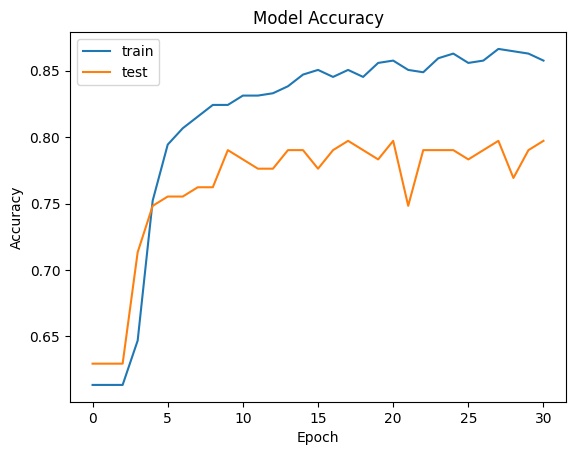

In [115]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

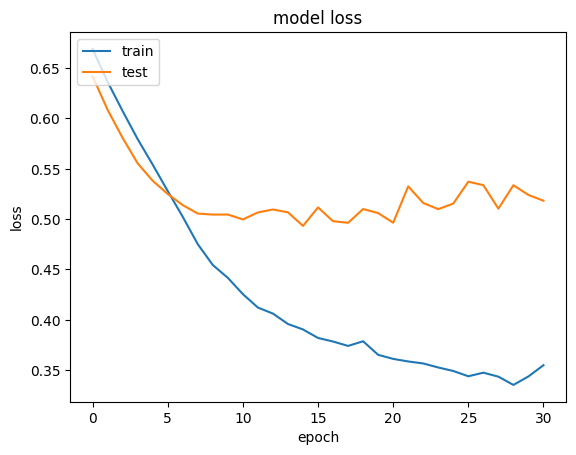

In [116]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
df_test = df_test.drop(["PassengerId"],axis =1 )


In [118]:
# 15-1.제출용를 predcit 로 뽑아냄
import tensorflow as tf
y_submit = model.predict(df_test)
# 1 과 1로 이진변환해주는 코드
y_submit =y_submit.flatten()
# y_predict 가 0.5 보다 크면 1 아니면 0 반환
y_submit = np.where(y_submit > 0.5, 1 , 0)
print(y_submit[:15])

14/14 [==============================] - 0s 2ms/step
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1]


In [119]:
path = "C:\study\mylearn\input\\"

submission = pd.read_csv(path + "gender_submission.csv",index_col="PassengerId")
# 15-2.제촐용을 데이터프레임형으로 변환

# 15-2 제출용의 카운트 칼럼에 y_submit 삽입
submission["Survived"] = y_submit.astype(int)
# 15-3 경로와 파일명 지정
submission.to_csv(path + "submission_1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\study\\mylearn\\input\\gender_submission.csv'